In [88]:
import shap
import xgboost
import matplotlib.pyplot as plt
import pandas as pd
shap.initjs()

### 0. 建模与加载数据

In [79]:
# 加载数据
X, y = shap.datasets.boston()

In [80]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [81]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [82]:
# 建模
model = xgboost.train(params={"learning_rate":0.01}
                      ,dtrain=xgboost.DMatrix(X, y)
                      , num_boost_round=100
                     )

In [83]:
model.get_score()

{'AGE': 52,
 'B': 55,
 'CRIM': 349,
 'DIS': 188,
 'INDUS': 57,
 'LSTAT': 298,
 'NOX': 186,
 'PTRATIO': 87,
 'RAD': 14,
 'RM': 333,
 'TAX': 49,
 'ZN': 3}

### 1. 构建解释器

In [106]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap_values.shape
shap_value.mean(axis=1)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


array([ 0.17379348,  0.05186554,  0.5534355 ,  0.54037464,  0.55343556,
        0.16997546, -0.08506056, -0.14892283, -0.25190175, -0.14892283,
       -0.24653274, -0.08506056, -0.14314167, -0.07297785, -0.05827229,
       -0.07297785, -0.05095321, -0.18642718, -0.09804888, -0.08580167,
       -0.374102  , -0.09804889, -0.31554353, -0.36564776, -0.31554347,
       -0.32146108, -0.21373357, -0.32146108, -0.08186407, -0.03701535,
       -0.37156537, -0.15018451, -0.36936897, -0.32146117, -0.37410206,
       -0.05690531, -0.07621042, -0.05043901, -0.07393564,  0.27351865,
        0.54037464,  0.2951617 ,  0.08130285,  0.08130285, -0.01736006,
       -0.09094749, -0.05560293, -0.12966676, -0.25651434, -0.11843111,
       -0.05560293,  0.00681829,  0.1699755 , -0.06076459, -0.17125715,
        0.55343544,  0.07249019,  0.35791203,  0.08130283, -0.06076466,
       -0.08907926, -0.12476091,  0.08130281,  0.16202396,  0.5284968 ,
        0.11728707, -0.07582197, -0.06076465, -0.08845759, -0.06

In [85]:
# 基本的baseline为所有预测结果的均值
explainer.expected_value

14.230186

In [86]:
model.predict(xgboost.DMatrix(X)).mean()

14.230188

### 2. 可解释性结果

#### 预测值可视化

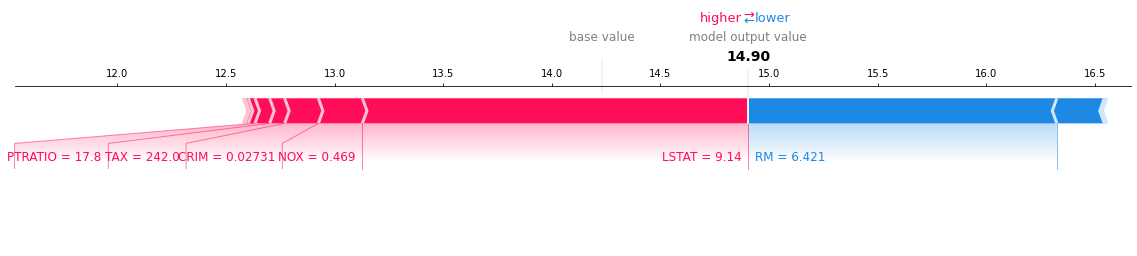

In [69]:
shap.force_plot(explainer.expected_value
                , shap_values[1,:]
                , X.iloc[1,:]
                , matplotlib=True
                
               )

解释：红色表示把预测结果从基本值推向最终结果的贡献特征，蓝色表预测结果降低的过程。

In [70]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

#### 多状态解释

In [71]:
# 多值可解释
shap.force_plot(explainer.expected_value, shap_values, X)

#### SHAP摘要图

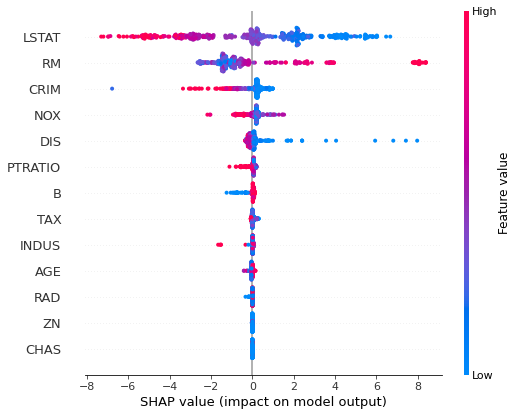

In [72]:
# summary_plot
"""
特征大小对样本分值的影响 
每个点是一个样本，纵坐标是每个特征，横坐标是shap值，图中每个点代表一个样本，
红色代表特征更大的值，蓝色代表更小的值；
"""
shap.summary_plot(shap_values, X)

结论：从图中可以看出，LSTAT对于最后结果的房价预测有较高的拉低作用，也即呈现负相关
，而RM对于房价结果预测有推进作用

#### SHAP特征重要性

In [99]:
# shap同样可以产生变量的重要性，但该重要性与树模型产生的结果可能有些差异，
# 它其实是将整体样本的shap-value的绝对值求均值得到的
df = pd.DataFrame(abs(shap_values), columns=X.columns).mean()
df.sort_values(ascending=False)

LSTAT      2.572092
RM         1.668474
CRIM       0.470907
NOX        0.298656
DIS        0.245498
PTRATIO    0.095597
B          0.081508
TAX        0.049007
INDUS      0.036680
AGE        0.034424
RAD        0.011467
ZN         0.001186
CHAS       0.000000
dtype: float32

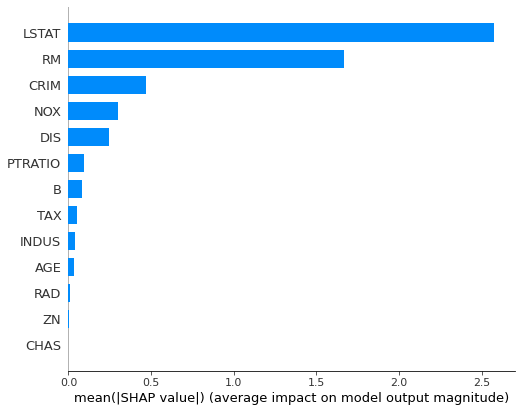

In [100]:
shap.summary_plot(shap_values, X, plot_type="bar")

#### 交互影响

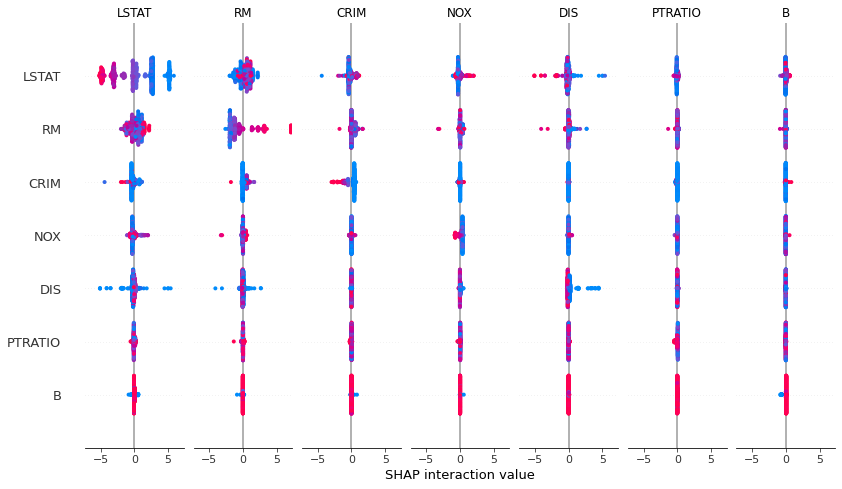

In [77]:
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)

#### SHAP依赖图

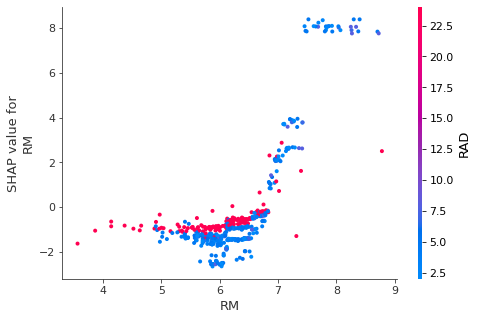

In [59]:
shap.dependence_plot("RM", shap_values, X)

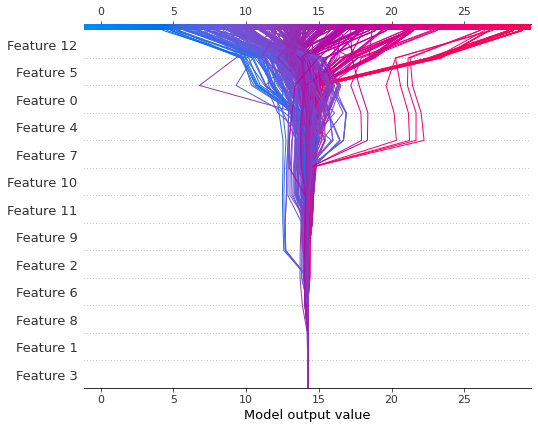

In [58]:
shap.decision_plot(explainer.expected_value, shap_values)

### 参考
[SHAP：Python的可解释机器学习库](https://zhuanlan.zhihu.com/p/83412330)  
[机器学习-shap是个好工具-20200202](https://zhuanlan.zhihu.com/p/101352812?utm_source=qq)  
[SHAP知识点全汇总](https://zhuanlan.zhihu.com/p/85791430?from_voters_page=true)